In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/_shared/IP_work')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [122]:
df = pd.read_csv('allfeatures.csv')

In [ ]:
df.columns

Index(['nAcid', 'apol', 'naAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nH',
       'nB', 'nC', 'nN',
       ...
       'PubchemFP874', 'PubchemFP875', 'PubchemFP876', 'PubchemFP877',
       'PubchemFP878', 'PubchemFP879', 'PubchemFP880', 'pcid', 'smile',
       'class'],
      dtype='object', length=1389)

In [ ]:
print(f'total na values: {df.isna().sum().sum()}')
print(f'total null values: {df.isnull().sum().sum()}')

total na values: 0
total null values: 0


In [123]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.02)

In [124]:
df1 = df.copy()
df.drop(columns=['pcid','smile','class'],axis=1,inplace=True)

In [125]:

def remove_infinities(df):
    # Check for infinite values in the DataFrame
    mask = np.isfinite(df).all(axis=1)
    # Drop rows containing infinite values
    return df[mask]

cleaned_df = remove_infinities(df.copy())
sel.fit(cleaned_df)

VarianceThreshold(threshold=0.02)

In [126]:
sum(sel.get_support())

876

In [127]:
columns=cleaned_df.columns[sel.get_support()]

In [ ]:
columns

Index(['nAcid', 'apol', 'naAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nH',
       'nB', 'nC', 'nN',
       ...
       'PubchemFP815', 'PubchemFP818', 'PubchemFP819', 'PubchemFP821',
       'PubchemFP822', 'PubchemFP824', 'PubchemFP827', 'PubchemFP836',
       'PubchemFP839', 'PubchemFP860'],
      dtype='object', length=876)

In [128]:
cleaned_df=sel.transform(cleaned_df)

In [129]:
cleaned_df=pd.DataFrame(cleaned_df,columns=columns)

In [ ]:
print(cleaned_df.shape)

(7722, 876)


In [ ]:
cleaned_df.head()

,nAcid,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,...,PubchemFP815,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP822,PubchemFP824,PubchemFP827,PubchemFP836,PubchemFP839,PubchemFP860
0,0.0,14.560758,6.0,6.0,12.0,6.0,6.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.366793,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7.700379,0.0,0.0,6.0,3.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,43.201516,20.0,24.0,32.0,20.0,12.0,0.0,20.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,43.201516,20.0,22.0,32.0,20.0,12.0,0.0,20.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


2 technique:
pearson correlation coffecient

In [ ]:
import seaborn as sns

<Axes: >

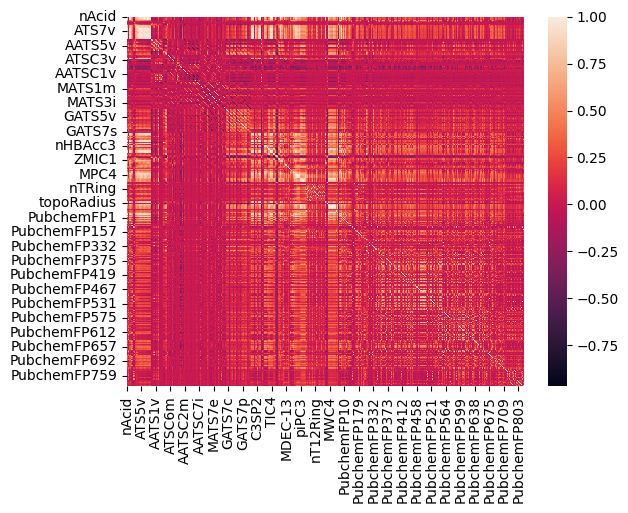

In [130]:
sns.heatmap(cleaned_df.corr())

In [131]:
corr_matrix=cleaned_df.corr()

In [132]:
columns_cor = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns_cor)):
    for j in range(i + 1, len(columns_cor)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns_cor[i], columns_cor[j]] > 0.98:
            columns_to_drop.append(columns_cor[j])

print(len(columns_to_drop))

407


In [133]:
columns_to_drop=set(columns_to_drop)

In [ ]:
len(columns_to_drop)

164

In [134]:
cleaned_df.drop(columns = columns_to_drop, axis = 0, inplace=True)

In [135]:
cleaned_df.shape

(7722, 712)

In [136]:
cleaned_df

,nAcid,apol,naAromAtom,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,...,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP836,PubchemFP839,PubchemFP860
0,0.0,14.560758,6.0,12.0,6.0,6.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.366793,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7.700379,0.0,6.0,3.0,3.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,43.201516,20.0,32.0,20.0,12.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,43.201516,20.0,32.0,20.0,12.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,1.0,56.225376,0.0,54.0,22.0,32.0,0.0,18.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7718,2.0,72.629755,0.0,66.0,31.0,35.0,0.0,23.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7719,3.0,73.431755,0.0,67.0,32.0,35.0,0.0,23.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7720,3.0,67.244583,0.0,61.0,30.0,31.0,0.0,21.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3) Priciple component Analysis:

In [ ]:
# X=cleaned_df.iloc[:,1:]
# y=cleaned_df.iloc[:,0]

This is the part of PCA technique


In [ ]:
# x=cleaned_df.iloc[:,1:]
# y=cleaned_df.iloc[:,0]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
cleaned_df=scaler.fit_transform(cleaned_df)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [ ]:
cleaned_df=pca.fit_transform(cleaned_df)

In [ ]:
cleaned_df.shape

(7722, 100)

In [ ]:
# cleaned_df
pd.read_csv('featureselection.csv')

,-1.131283950322755416e+01,-2.599116595854908507e+00,3.431191228384238290e-01,-8.467382281244987263e-01,-1.272140460277325413e+00,-3.554517319244169471e+00,-3.796879289500793675e+00,-2.428017433724967145e+00,-1.378519285509829606e+00,-1.976846588787753989e-01,...,1.764557366668601801e-01,2.239743347103461193e-02,4.189818573939331214e-01,-2.272504156877845072e-01,-2.110640929002944588e-01,1.934353124727663520e-01,4.270721347819554370e-01,-1.872125512833207606e-01,1.570476457187581776e-01,-2.753834699317465051e-01
0,-22.996435,7.204905,12.182193,8.593652,-2.630234,4.363113,-3.926097,0.392529,1.504513,-3.244811,...,-0.878434,0.150002,0.226152,-0.008733,0.031561,0.319440,-0.998045,-0.451549,-0.727037,1.567208
1,-16.243091,2.841909,2.368442,-0.631983,-0.363865,-0.834368,-2.197915,-3.269550,-0.544873,1.904040,...,-0.125339,0.152712,-0.947776,-0.022866,0.248224,0.219675,-0.254459,0.496671,0.407894,-0.816915
2,3.253548,-12.387101,2.624556,4.416462,-3.908908,-4.942633,-0.921534,-5.824149,2.764206,-1.225471,...,0.533198,-0.433962,0.107884,-0.101831,-0.256407,-0.737266,0.262551,0.031220,0.112843,0.238758
3,3.336230,-12.176659,2.541698,4.712458,-3.651103,-5.128095,-0.670904,-6.883914,1.694567,-1.232511,...,-0.325333,-0.566898,-0.599109,0.720914,0.269434,0.166052,-1.028656,-0.800910,-0.005280,0.287686
4,-18.560861,4.395417,4.945205,3.044478,-0.840257,0.382189,-5.245112,-2.980023,-1.631200,1.701761,...,0.202145,-0.359593,-0.558070,-0.397230,0.052943,-0.061325,-0.159489,0.654057,0.253657,-0.405233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7716,-0.930995,-1.201626,-8.459956,0.974963,0.498952,-1.822559,-1.256045,2.585505,-3.667152,-0.790245,...,0.107210,-0.139282,-0.020729,0.021985,-0.375613,0.063870,-0.311109,0.045627,-0.085009,0.449994
7717,4.098622,1.720137,-8.036607,0.023412,1.378558,-0.553170,-2.045542,4.510781,-2.638483,-1.231356,...,-0.079506,0.242770,0.171760,0.079373,0.351400,0.373070,0.157549,0.008292,-0.272498,0.445251
7718,4.316161,2.123583,-7.846933,0.454678,1.508373,-0.717327,-2.081549,4.558164,-2.409681,-1.094948,...,-0.050947,0.080035,0.094427,0.249251,0.315782,0.409265,0.363448,0.368274,-0.267566,0.532760
7719,4.001501,1.849309,-7.425851,-0.401115,1.631054,-0.211471,-1.822165,4.410350,-1.767461,-1.182590,...,-0.145318,0.142928,-0.137978,0.051959,0.304866,0.551869,0.514381,0.247673,-0.506460,0.277217


In [ ]:
np.savetxt("featureselection.csv", cleaned_df, delimiter=",")

implementing KNN model to find the accuracy of the model by using Pca technique:

In [ ]:
# # df = df.drop(['Unnamed: 0', 'index'], axis=1)

# X = df.drop(['class'], axis=1)
# y = df['class']

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(6177, 1386)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

0.9653823375701904


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)

In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf.shape

(6177, 500)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

0.0

In [ ]:
for i in range(1,524):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))
# This part of the code gives me the 0% accuracy score vinit dekh lena i guess something is wrong in implementation


In [ ]:
#neural network with keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



# X = df.drop(['class', 'smile'], axis=1)  # feature matrix
# y = df['class']  # label vector
# Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = cleaned_df
y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = X_train_trf
# X_test = X_test_trf
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

49/49 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.8472
Accuracy: 0.85


In [147]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the necessary columns
X = cleaned_df  # feature matrix
y = df1['class']  # label vector (binary)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance of XGBoost not necessary but can be performed if part of your preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.01,
                          n_estimators=1000,
                          objective='binary:logistic',
                          nthread=4,
                          subsample=0.8,
                          min_child_weight=5,
                          max_depth=7,
                          gamma=1,
                          colsample_bytree=1)

# model = xgb.XGBClassifier(learning_rate = 0.08,
#                           max_depth = 7,
#                           min_child_weight = 1,
#                           n_estimators = 200,
#                           use_label_encoder=False,
#                           eval_metric='logloss',
#                           nthread=4)

# model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for positive class

# Calculating the evaluation metrics
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing the metrics
print(f"ROC AUC Score: {auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

ROC AUC Score: 0.95
F1 Score: 0.87
Precision: 0.88
Recall: 0.86
Accuracy: 0.88


In [144]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
X = cleaned_df  # feature matrix
y = df1['class']  # label vector

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model definition with increased max_iter
model = LogisticRegression(solver='sag', random_state=40, max_iter=1000, C=0.01)

# Fit GridSearchCV
model.fit(X_train, y_train)

y_pred_proba = model.predict(X_test)

# Calculate class predictions with a default threshold of 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Individual metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)  # AUC using predicted probabilities
accuracy = accuracy_score(y_test, y_pred)

# Print individual metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Test AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.8582
Recall: 0.8198
F1 Score: 0.8385
Test AUC: 0.8479
Accuracy: 0.85
